In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully !")

data.tail(10)

Data imported successfully !


,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


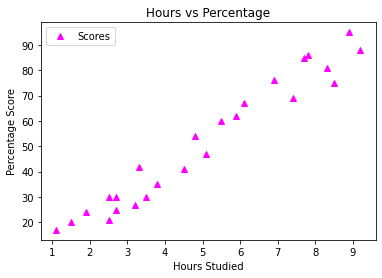

In [4]:
data.plot(x='Hours', y='Scores', color='magenta',style='^')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

<AxesSubplot:>

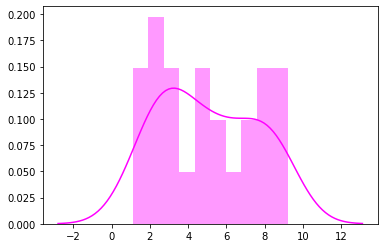

In [6]:
sns.distplot(x,bins=10, color='magenta')

<AxesSubplot:>

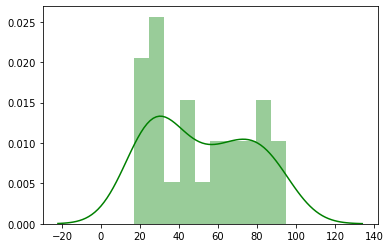

In [7]:
sns.distplot(y,bins=10, color='green')

<AxesSubplot:>

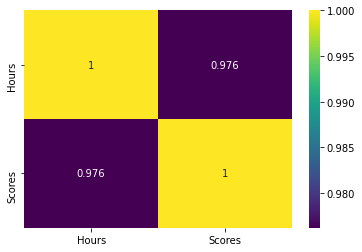

In [8]:
sns.heatmap(data.corr(),cmap='viridis',annot=True ,fmt='.3g')

In [9]:
print(x)
print('\n', y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.38, random_state=1)

In [11]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

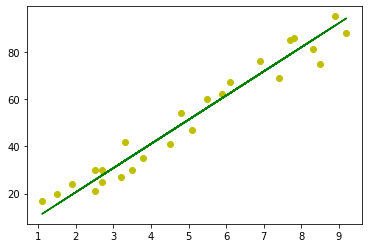

In [12]:
line = linear.coef_* x+ linear.intercept_

plt.scatter(x, y,color='y')
plt.plot(x, line , color='g')
plt.show()

In [13]:
print(X_test)
y_pred = linear.predict(X_test) 

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]
 [7.4]
 [3.5]
 [3.2]]


In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,17,11.374353
1,42,33.854718
2,24,19.549031
3,75,86.990125
4,54,49.182239
5,85,78.815447
6,67,62.466091
7,69,75.749943
8,30,35.898387
9,27,32.832883


In [15]:
hours = [[9.25]]
own_pred = linear.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.65388540708372


In [16]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 6.422945894664219


In [17]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)) )

Root Mean Squared Error: 6.767265430574755
